<a href="https://colab.research.google.com/github/gabrielabura/Credit-default-risk-analysis/blob/main/Gabriel_Abura_Credit_Risk_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nested_cv

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import the required Libraries.
#
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("dark_background")
plt.style.use('bmh')
# -----------
#
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB 
# ------
#
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor



# Neural Networks Libraries.
#
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report,confusion_matrix

# MLP for Pima Indians Dataset with 10-fold cross validation via sklearn
#
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
# Validation Libraries.
#
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold


from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from nested_cv import NestedCV
import xgboost as xgb
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

from sklearn import metrics


**Loading our data**

In [ ]:
# Loading the train dataset.
#
train = pd.read_csv("/content/credit_risk_dataset_training.csv")
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [ ]:
# Load the test dataset.
#
test = pd.read_csv("/content/credit_risk_dataset_test.csv")
test.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length,loan_status
0,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3,NaN
1,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4,NaN
2,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,0.44,N,4,NaN
3,26,108160,RENT,4.0,EDUCATION,E,35000,18.39,0.32,N,4,NaN
4,23,92111,RENT,7.0,MEDICAL,F,35000,20.25,0.32,N,4,NaN


**Checking the data**

In [ ]:
# Checking for description of our data
#

train.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,22850.000000,2.285000e+04,22237.000000,22850.000000,20703.000000,22850.000000,22850.000000,22850.000000
mean,27.717812,6.604363e+04,4.800018,9595.500000,11.014324,0.220306,0.170243,5.801400
std,6.327822,6.423370e+04,4.112390,6327.603663,3.244035,0.414462,0.106557,4.050767
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.840000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.939500e+04,7.000000,12250.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.780000,30.000000


In [ ]:
# Check for the size of the dataset.
#
train.shape

(22850, 12)

In [ ]:
# Check dataframe columns.
#
train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# Checking the datatypes

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22850 non-null  int64  
 1   person_income               22850 non-null  int64  
 2   person_home_ownership       22850 non-null  object 
 3   person_emp_length           22237 non-null  float64
 4   loan_intent                 22850 non-null  object 
 5   loan_grade                  22850 non-null  object 
 6   loan_amnt                   22850 non-null  int64  
 7   loan_int_rate               20703 non-null  float64
 8   loan_status                 22850 non-null  int64  
 9   loan_percent_income         22850 non-null  float64
 10  cb_person_default_on_file   22850 non-null  object 
 11  cb_person_cred_hist_length  22850 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.1+ MB


In [ ]:
# We need to check the unique values for our data so that we understand how
# the data looks like

columns = train.columns.to_list()

for column in columns:
  print("Unique Values for", column)
  print("\n")
  print(train[column].unique())
  print("\n")

Unique Values for person_age


[ 22  21  23  26  24  25 144 123  20  34  33  29  31  27  30  35  28  32
  50  36  45  37  39  44  40  43  41  46  38  42  47  48  49  58  51  53
  61  54  66  57  62  60  55  52  64  70  78  65  69  56  73  63  94  59
  84  76]


Unique Values for person_income


[ 59000   9600  65500 ...   4888 129000  71520]


Unique Values for person_home_ownership


['RENT' 'OWN' 'MORTGAGE' 'OTHER']


Unique Values for person_emp_length


[123.   5.   4.   2.   8.   6.   7.   0.   3.  10.   1.   9.  nan  11.
  18.  17.  14.  16.  13.  19.  15.  12.  20.  22.  21.  24.  23.  26.
  25.  27.  28.  31.  41.  34.  29.  38.  30.]


Unique Values for loan_intent


['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


Unique Values for loan_grade


['D' 'B' 'C' 'A' 'E' 'F' 'G']


Unique Values for loan_amnt


[35000  1000  2500  1600  4500 30000  1750 34000  1500 33950 33000  4575
  1400  4000  2000 31050 24250  7800 10000 25000 18000 12000  9

**Tidying the dataset**

In [ ]:
# Checking for null values

train.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              613
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2147
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
# Dealing with the null values 

# Filling null values in person_emp_length, loan_int_rate

cols_ffill = ['person_emp_length', 'loan_int_rate']

for column in cols_ffill:
  train[column] = train[column].ffill()

In [ ]:
# Confirming that we have no null values

train.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
# Creating a dataframe for categorical variables.
#
objects = ['object']
categorical_cols = train.select_dtypes(include=objects)
categorical_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      22850 non-null  object
 1   loan_intent                22850 non-null  object
 2   loan_grade                 22850 non-null  object
 3   cb_person_default_on_file  22850 non-null  object
dtypes: object(4)
memory usage: 714.2+ KB


In [ ]:
# Create a dataframe for numerical variables.
#

objects = ['int64','float64']
numeric = train.select_dtypes(include=objects)
numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22850 entries, 0 to 22849
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  22850 non-null  int64  
 1   person_income               22850 non-null  int64  
 2   person_emp_length           22850 non-null  float64
 3   loan_amnt                   22850 non-null  int64  
 4   loan_int_rate               22850 non-null  float64
 5   loan_status                 22850 non-null  int64  
 6   loan_percent_income         22850 non-null  float64
 7   cb_person_cred_hist_length  22850 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 1.4 MB


Outlier in Numeric Columns.
 [[144.0, 123.0, 50.0, 45.0, 44.0, 43.0, 41.0, 43.0, 46.0, 44.0, 43.0, 46.0, 42.0, 47.0, 41.0, 44.0, 41.0, 41.0, 48.0, 45.0, 42.0, 45.0, 45.0, 44.0, 42.0, 45.0, 41.0, 45.0, 50.0, 41.0, 41.0, 47.0, 44.0, 46.0, 44.0, 46.0, 43.0, 42.0, 45.0, 49.0, 45.0, 47.0, 41.0, 46.0, 47.0, 48.0, 50.0, 43.0, 47.0, 48.0, 41.0, 47.0, 43.0, 42.0, 46.0, 48.0, 45.0, 43.0, 41.0, 41.0, 45.0, 41.0, 47.0, 42.0, 41.0, 43.0, 45.0, 44.0, 43.0, 49.0, 46.0, 43.0, 48.0, 42.0, 48.0, 42.0, 46.0, 41.0, 45.0, 44.0, 41.0, 45.0, 41.0, 48.0, 50.0, 43.0, 41.0, 48.0, 45.0, 48.0, 41.0, 44.0, 43.0, 42.0, 48.0, 45.0, 48.0, 43.0, 46.0, 41.0, 44.0, 44.0, 44.0, 41.0, 48.0, 45.0, 43.0, 44.0, 46.0, 47.0, 44.0, 42.0, 42.0, 42.0, 45.0, 42.0, 42.0, 41.0, 47.0, 44.0, 48.0, 41.0, 41.0, 41.0, 47.0, 42.0, 47.0, 47.0, 45.0, 43.0, 41.0, 43.0, 42.0, 50.0, 44.0, 41.0, 47.0, 45.0, 42.0, 48.0, 41.0, 43.0, 42.0, 42.0, 44.0, 41.0, 44.0, 44.0, 46.0, 44.0, 43.0, 44.0, 44.0, 41.0, 41.0, 43.0, 45.0, 42.0, 50.0, 42.0, 50.0, 4

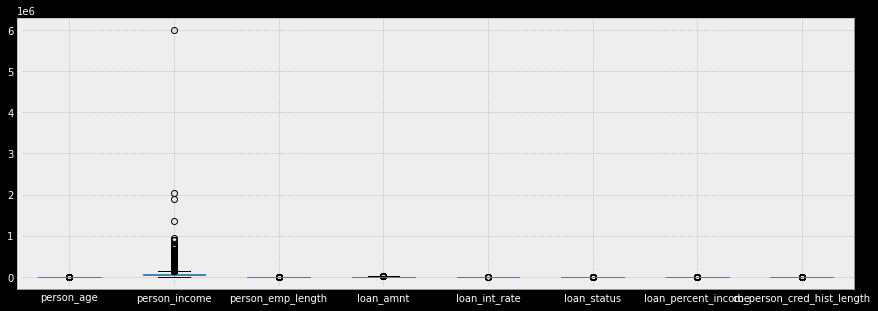

In [ ]:
# Checking for outliers in the numeric columns 

plt.figure(figsize=(15,5))

_t, df_outliers = pd.DataFrame.boxplot(numeric, return_type="both", widths=0.6)

outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]

# pring a list containing our outliers and boxplots for our outliers
print("Outlier in Numeric Columns.\n", out_liers)

In [ ]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numeric:
    rows, columns = numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

person_age has 391 outliers in total, which is 1.7% of data
person_income has 159 outliers in total, which is 0.7% of data
person_emp_length has 235 outliers in total, which is 1.0% of data
loan_amnt has 242 outliers in total, which is 1.1% of data
loan_int_rate has 25 outliers in total, which is 0.11% of data
loan_status has 0 outliers in total, which is 0.0% of data
loan_percent_income has 258 outliers in total, which is 1.1% of data
cb_person_cred_hist_length has 204 outliers in total, which is 0.89% of data


Our dataset has outliers in the following columns:



*   person_age
*   person_income

*   person_emp_length
*   loan_amount
*   loan_int_rate
*   loan_percent_income
*   cb_person_cred_hist_length




We choose not to deal with these outliers because they might reduce the entries in our dataset. We need all the entries to build a model that represents the market place.

In [ ]:
# Exporting our cleaned dataset

train.to_csv('training_clean.csv')

**Exploratory Data Analysis**

In [ ]:
cols = numeric.columns
cols


Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


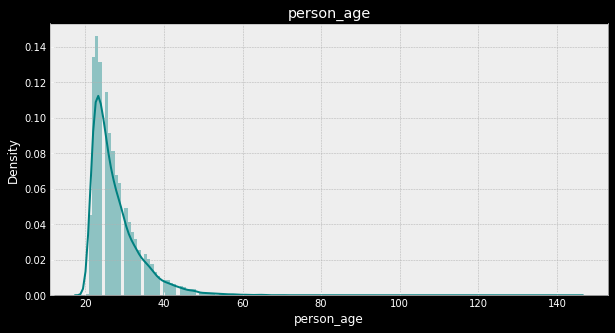

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


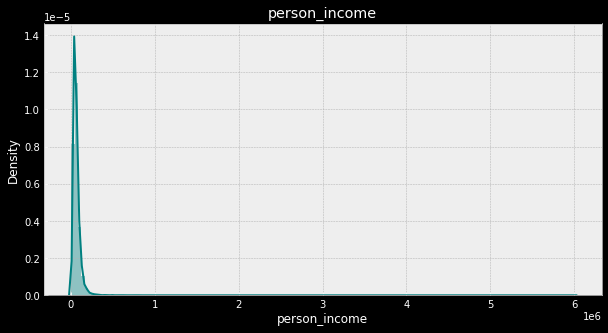

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


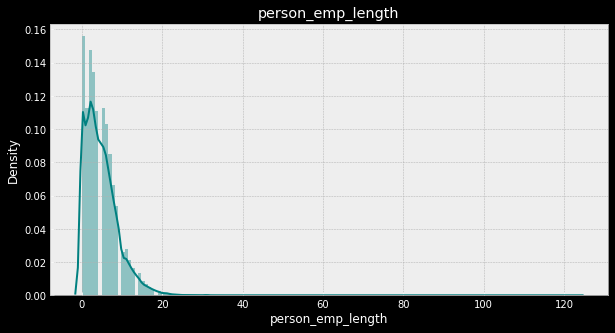

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


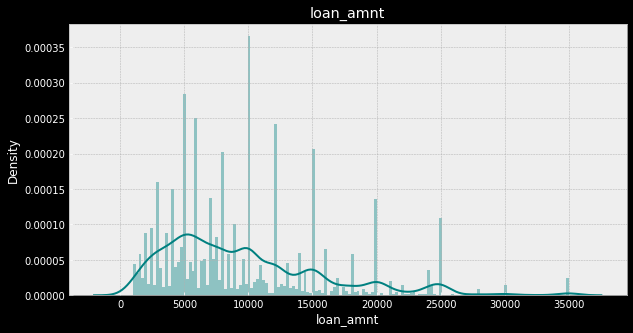

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


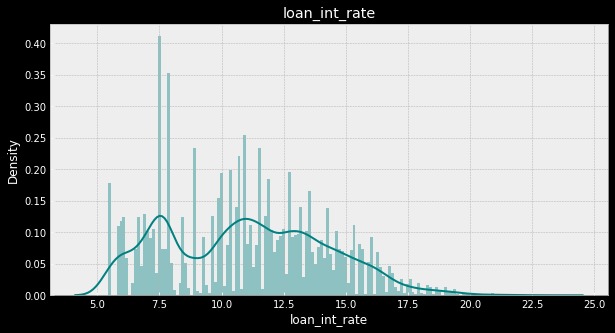

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


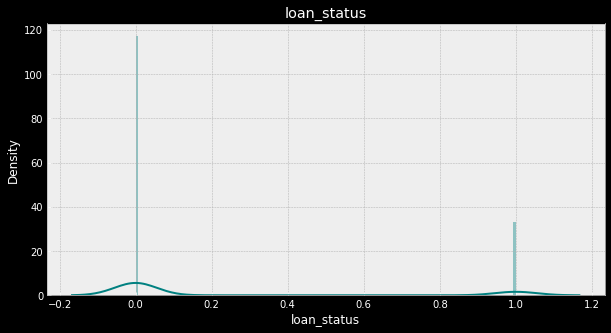

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


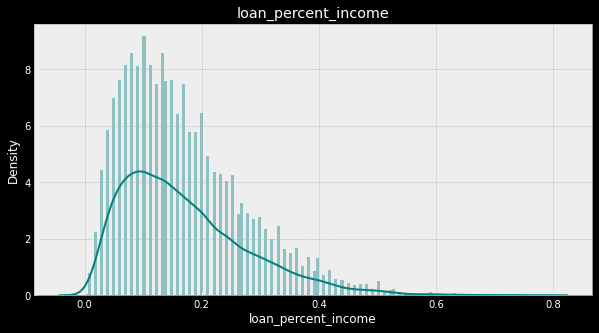

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


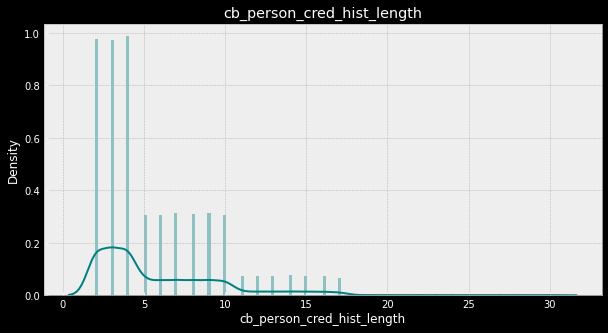

In [ ]:
# Ploting the bivariate summaries and recording our observations
# Plot histogram of frequency for the columns

for i, j in enumerate(numeric):
  plt.figure(figsize=(10, 5))
  plt.title(j)
  sns.set_color_codes("pastel")
  sns.distplot(train[j], color='teal',norm_hist=True,kde=True,bins=150)
  plt.show()

In [ ]:
# Previewing the categorigal column

categorical_cols

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,RENT,MEDICAL,C,N
3,OWN,VENTURE,A,N
4,RENT,EDUCATION,B,N
...,...,...,...,...
22845,RENT,PERSONAL,D,Y
22846,MORTGAGE,PERSONAL,C,N
22847,MORTGAGE,PERSONAL,A,N
22848,MORTGAGE,PERSONAL,B,N


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


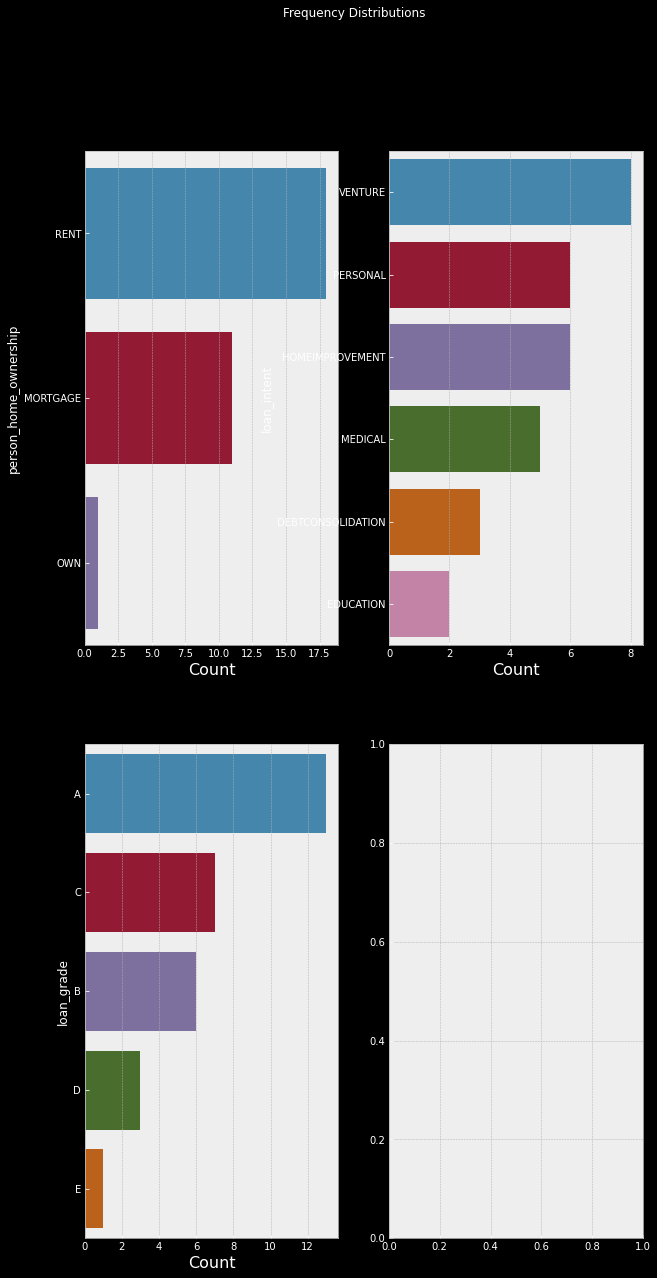

In [ ]:
# Plotting sublots for our categorical variables.
#
fig, ax = plt.subplots(2,2, figsize=(10, 20))
fig.suptitle('Frequency Distributions')
ax = ax.flatten()
categorical = categorical_cols.iloc[:, :-1].sample(n = 30, replace=True) 
#iterating our columns as we plot
for i, col in enumerate(categorical):
    sns.barplot(categorical[col].value_counts(),categorical[col].value_counts().keys(), ax=ax[i])
    ax[i].set_ylabel(col)
    ax[i].set_xlabel('Count', fontsize=16)
      
plt.show()

person_home_ownership


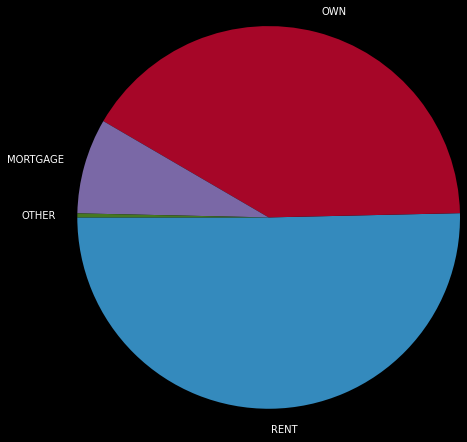



loan_intent


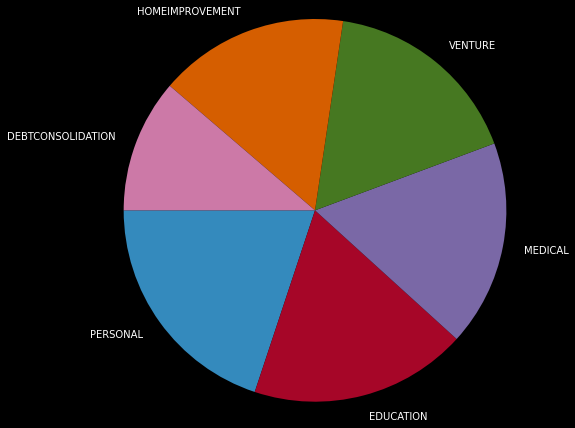



loan_grade


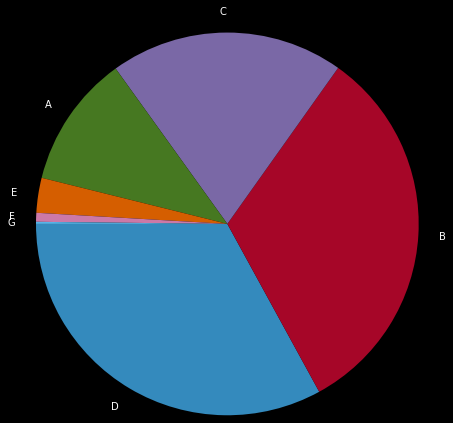



cb_person_default_on_file


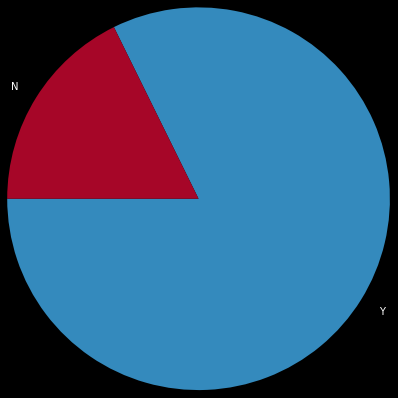

In [ ]:
# Drawing frequency tables for the categorical variale
#
for col in categorical_cols:
    counts = train[col].value_counts()
    print(col)
    labels = train[col].unique()
    plt.pie(counts, labels = labels, radius=2.2, labeldistance=1.11, startangle=180,counterclock=True)
    plt.show()
    print("\n")

In [ ]:
train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
!pip install --upgrade plotly

import plotly.express as px

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Heat maps**

In [ ]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
3,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
4,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3


In [ ]:
train.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [ ]:
# Heatmap for Claims made for the different building type

import plotly.express as px

fig = px.treemap(train, path=['loan_grade'], values='loan_int_rate', color='loan_grade', title= "Tree of Interest rates for various loan grades")
fig.show()

**Label Encoding the columns**

In [ ]:
# import labelencoder
from sklearn.preprocessing import LabelEncoder

categorical = categorical_cols.columns.tolist()

# instantiate labelencoder object

le = LabelEncoder()
#apply le on categorical feature columns
for i, category in enumerate(categorical):
  train[category] = le.fit_transform(train[category])

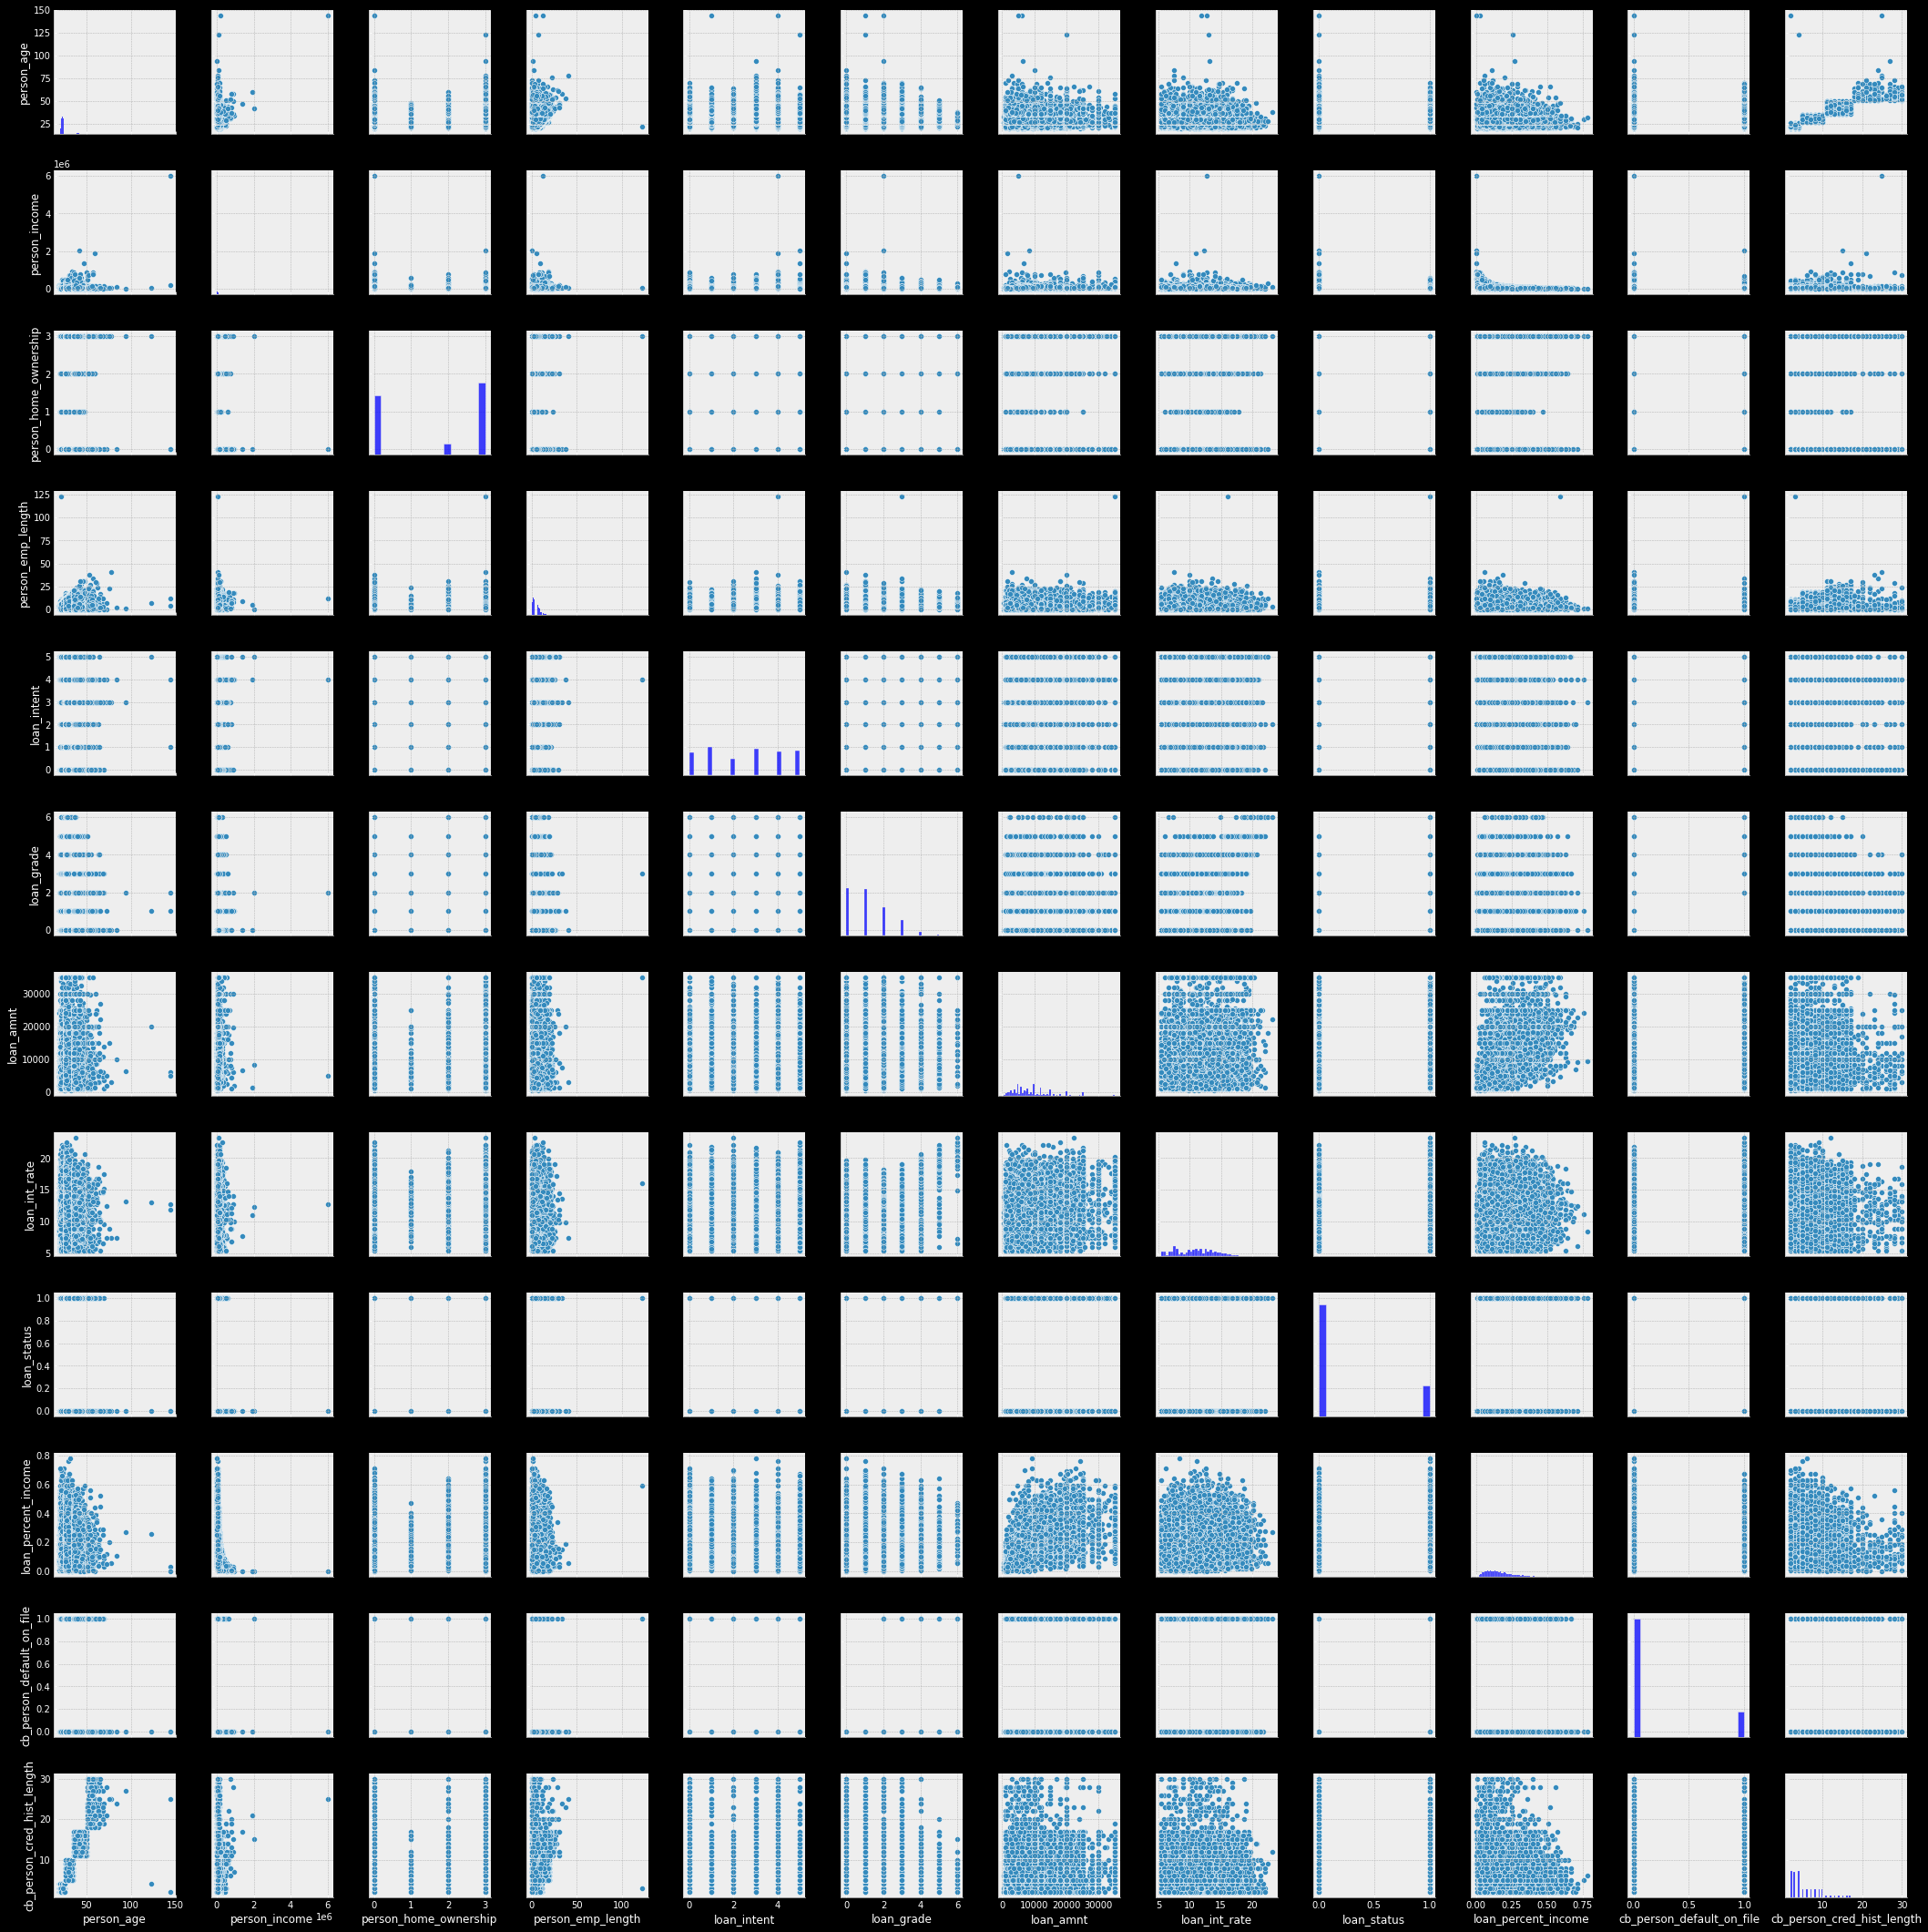

In [ ]:
# Ploting pair plots

sns.pairplot(train)

plt.show()

In [ ]:
# Correlation matrix

corr = train.corr()

corr

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
person_age,1.000000,0.184800,-0.037581,0.166177,0.028795,0.014932,0.047127,0.015505,-0.019098,-0.045282,0.005141,0.862325
person_income,0.184800,1.000000,-0.200715,0.125649,0.000679,0.001124,0.257803,0.004591,-0.139895,-0.244967,-0.001627,0.114556
person_home_ownership,-0.037581,-0.200715,1.000000,-0.222810,0.009349,0.120075,-0.130252,0.128970,0.209400,0.147803,0.065186,-0.027587
person_emp_length,0.166177,0.125649,-0.222810,1.000000,0.013060,-0.049586,0.108187,-0.048339,-0.078579,-0.051260,-0.033829,0.146344
loan_intent,0.028795,0.000679,0.009349,0.013060,1.000000,-0.007529,-0.001896,-0.000107,-0.065554,0.006557,-0.005665,0.030236
loan_grade,0.014932,0.001124,0.120075,-0.049586,-0.007529,1.000000,0.145340,0.853382,0.372345,0.121299,0.541328,0.016494
loan_amnt,0.047127,0.257803,-0.130252,0.108187,-0.001896,0.145340,1.000000,0.136274,0.106749,0.573556,0.038494,0.040753
loan_int_rate,0.015505,0.004591,0.128970,-0.048339,-0.000107,0.853382,0.136274,1.000000,0.304306,0.108754,0.460605,0.020716
loan_status,-0.019098,-0.139895,0.209400,-0.078579,-0.065554,0.372345,0.106749,0.304306,1.000000,0.377689,0.183577,-0.013249
loan_percent_income,-0.045282,-0.244967,0.147803,-0.051260,0.006557,0.121299,0.573556,0.108754,0.377689,1.000000,0.035525,-0.033787


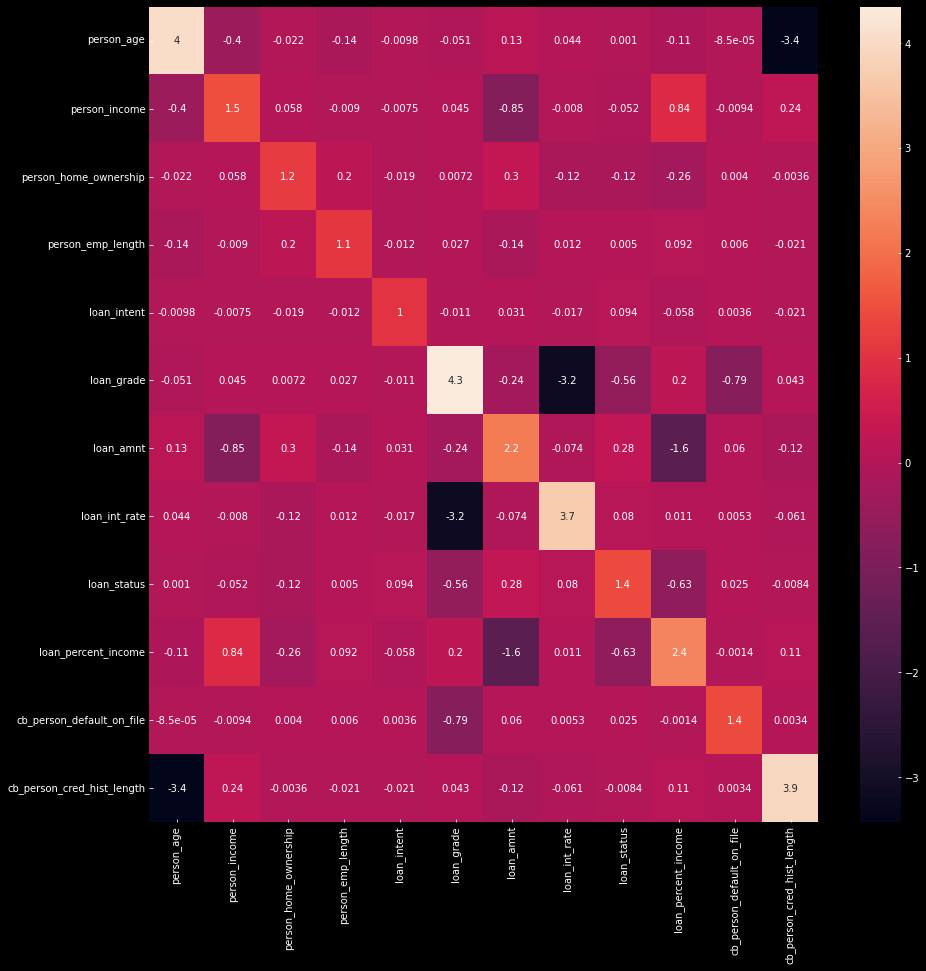

In [ ]:
# Plot a heatmap.

vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 15))

sns.heatmap(vif, annot = True)
plt.show()

## Implementing the solution

### KNN

In [ ]:
df = train.copy()

In [ ]:
train.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
3,21,9900,2,2.0,5,0,2500,7.14,1,0.25,0,2
4,26,77100,3,8.0,1,1,35000,12.42,1,0.45,0,3


In [ ]:

# Split the data into features and labels.
# 
X = df.drop(['loan_status'],1)

y = df['loan_status'].values


# Split the data into Train and Test sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

clf = KNeighborsClassifier(10)

clf.fit(X_train, np.ravel(y_train,order='C'))
knn_y_pred = clf.predict(X_test)

# Initialize our random classifier function as forest.
#
compare = pd.DataFrame({'Actual' : y_test.flatten(),
                        'Predicted' : knn_y_pred.flatten()})

compare.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,0


In [ ]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_test,knn_y_pred)*100))
print('Precision Score : ' + str(precision_score(y_test,knn_y_pred)*100))
print('Recall Score : ' + str(recall_score(y_test,knn_y_pred)*100))
print('F1 Score : ' + str(f1_score(y_test,knn_y_pred)*100))

Accuracy Score : 86.43326039387308
Precision Score : 84.6551724137931
Recall Score : 48.043052837573384
F1 Score : 61.298377028714114


In [ ]:
# Root Mean Squared Error.
#
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, knn_y_pred))}")
print(f"MSE: {metrics.mean_squared_error(y_test, knn_y_pred)}")
print(f"MAE: {metrics.mean_absolute_error(y_test, knn_y_pred)}")

RMSE: 0.3683305527121924
MSE: 0.13566739606126915
MAE: 0.13566739606126915
